<a href="https://colab.research.google.com/github/DanRMO/mvp-analisededadoseboaspraticas/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados e Boas Práticas**

# **Aluno: Dan Rodrigues de Morais de Oliveira**

# **1. Definição do Problema**

O dataset utilizado neste projeto será o **Student Classification Dataset**, disponibilizado no site Kaggle pelo link a seguir: https://www.kaggle.com/datasets/jacksondivakarr/student-classification-dataset/data
A base de dados contém informações referentes a alunos de High School.

# Atributos do dataset:

*   ***Student_Age:*** idade do aluno
*   ***Sex:*** gênero do aluno (male/female)
*   ***High_School_Type:*** tipo da escola (privada, estado, outro)
*   ***Scholarship:*** bolsa de estudos
*   ***Additional_Work:*** trabalhos extras
*   ***Sports_activity:*** atividade física
*   ***Transportation:*** forma de transporte
*   ***Weekly_Study_Hours:*** horas de estudos semanais
*   ***Attendance:*** frequência as aulas
*   ***Reading:*** leitura
*   ***Notes:*** faz anotações nas aulas
*   ***Listening_in_Classs:*** atenção nas aulas
*   ***Project_work:*** projeto de trabalho
*   ***Grade:*** nota do aluno



Primeiro, faremos a importação de todas as ferramentas necessárias para desenvolvimento do trabalho.

In [287]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns




In [288]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# **2. Carga de Dados**

Utilizando o pacote Pandas, carregaremos o dataset em .csv de acordo com o cabeçalho informado na descrição dos atributos.

In [289]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/DanRMO/mvp-analisededadoseboaspraticas/main/student.csv"



# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url)

In [290]:
# Visualiza as primeiras 5 linhas para verificarmos se os dados foram importados corretamente
dataset.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Vamos remover as colunas desnecessárias: Unnamed : 0 e ID

In [291]:
remover = ['Unnamed: 0', 'Id']
df = dataset.drop(columns=remover)

df.head()

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


# **3. Análise e tratamento dos dados**

Faremos análise das informações presentes no dataset e tratamentos que forem necessários para melhor visualização dos dados e conclusão do trabalho.

In [292]:
# Mostra as dimensões do dataset
print(df.shape)

(145, 14)


In [293]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df.describe()

,Student_Age,Weekly_Study_Hours
count,145.000000,145.000000
mean,19.682759,2.331034
std,1.992010,4.249273
min,18.000000,0.000000
25%,18.000000,0.000000
50%,19.000000,0.000000
75%,21.000000,2.000000
max,26.000000,12.000000


In [294]:
# Mostra as informações do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_Age         145 non-null    int64 
 1   Sex                 145 non-null    object
 2   High_School_Type    145 non-null    object
 3   Scholarship         145 non-null    object
 4   Additional_Work     145 non-null    object
 5   Sports_activity     145 non-null    object
 6   Transportation      145 non-null    object
 7   Weekly_Study_Hours  145 non-null    int64 
 8   Attendance          145 non-null    object
 9   Reading             145 non-null    object
 10  Notes               145 non-null    object
 11  Listening_in_Class  145 non-null    object
 12  Project_work        145 non-null    object
 13  Grade               145 non-null    object
dtypes: int64(2), object(12)
memory usage: 16.0+ KB
None


Podemos verificar que não há informações faltando em nosso dataset.

In [295]:
# verificando valores categóricos para colunas de tipo de objeto
for column in df.select_dtypes(include='object').columns:
    print(f"{column}, {df[column].unique()}")

Sex, ['Male' 'Female']
High_School_Type, ['Other' 'State' 'Private']
Scholarship, ['50%' '75%' '100%' '25%' 'None']
Additional_Work, ['Yes' 'No']
Sports_activity, ['No' 'Yes']
Transportation, ['Private' 'Bus']
Attendance, ['Always' 'Never' 'Sometimes' '3']
Reading, ['Yes' 'No']
Notes, ['Yes' 'No' '6']
Listening_in_Class, ['No' 'Yes' '6']
Project_work, ['No' 'Yes']
Grade, ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


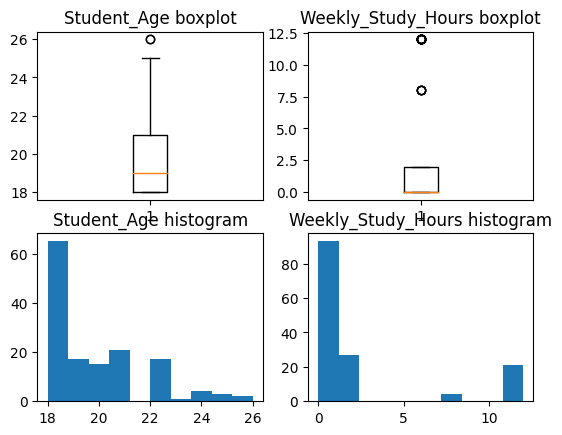

In [296]:
# conferindo a distribuiçãp de colunas numéricas
fig, axes = plt.subplots(2,2)
for i, column in enumerate(df.select_dtypes(include='number').columns):
    if i <= 1:
        axes[0][i].boxplot(df[column])
        axes[0][i].set_title(f'{column} boxplot')
        axes[1][i].hist(df[column])
        axes[1][i].set_title(f'{column} histogram')


plt.show()

Com os histogramas e bloxplots acima, verificamos que os nossos dados estão condizentes e não demonstra ter nenhum problema com as categorias analisadas e corroboram a análise estatística feita sobre as colunas númericas.

In [297]:
# analisando os valores categóricos que apresentaram valores estranhos (Notes, Attendance e Listening_in_Class)
print(df[df['Notes'] ==  '6'].shape) #duas colunas com dados estranhos
print(df[df['Attendance'] == '3'].shape) #uma coluna com dados estranhos
print(df[df['Listening_in_Class'] == '6'].shape) #duas colunas com dados estranhos

(2, 14)
(1, 14)
(1, 14)


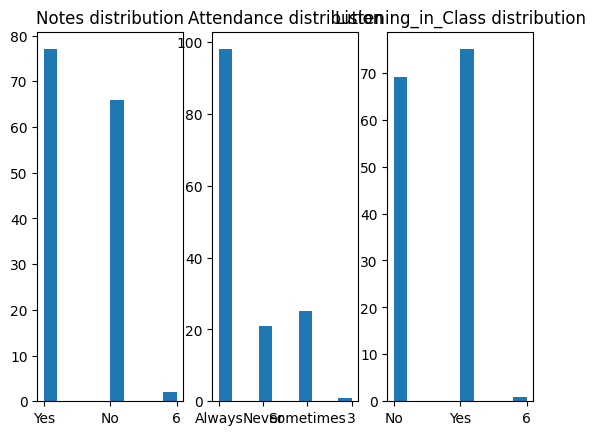

In [298]:
# analisando com histograma os resultados das colunas acima
fig, axs = plt.subplots(1,3)
axs[0].hist(df['Notes'])
axs[0].set_title('Notes distribution')

axs[1].hist(df['Attendance'])
axs[1].set_title('Attendance distribution')

axs[2].hist(df['Listening_in_Class'])
axs[2].set_title('Listening_in_Class distribution')

plt.show()

Considerando que para a coluna "Attendance distribution", a maioria das informações são "always", iremos alterar a única ocorrência em "3" para "always".
Para as outras duas colunas, como a distribuição são parecidas, iremos excluir a coluna que apresenta problema.

In [299]:
# removendo colunas com valores estranhos em 'notes' and 'Listening_in_Class'
df = df[df['Notes'] != '6']
df = df[df['Listening_in_Class'] != '6']

# alterando o valor de '3' para 'always', categoria mais frequente no dataset
df['Attendance'] = df['Attendance'].replace('3', 'Always')

In [300]:
# verificando valores categóricos para colunas de tipo de objeto após as alterações propostas
for column in df.select_dtypes(include='object').columns:
    print(f"{column}, {df[column].unique()}")

Sex, ['Male' 'Female']
High_School_Type, ['Other' 'State' 'Private']
Scholarship, ['50%' '75%' '100%' '25%' 'None']
Additional_Work, ['Yes' 'No']
Sports_activity, ['No' 'Yes']
Transportation, ['Private' 'Bus']
Attendance, ['Always' 'Never' 'Sometimes']
Reading, ['Yes' 'No']
Notes, ['Yes' 'No']
Listening_in_Class, ['No' 'Yes']
Project_work, ['No' 'Yes']
Grade, ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


In [301]:
# analisando as ocorrências de Attendance
df['Attendance'].value_counts()


Always       99
Sometimes    22
Never        21
Name: Attendance, dtype: int64

In [302]:
# analisando as ocorrências de Grade
df['Grade'].value_counts()

AA      35
BA      23
BB      20
CC      17
DD      16
DC      13
CB      10
Fail     8
Name: Grade, dtype: int64

Para melhor visualização de análise dos dados, iremos transformar as colunas de Attendance e Grades para valores numéricos.

In [303]:
# alterando as colunas desejadas para valores numéricos
print(df['Grade'].unique())
grades_map = {'AA': 1, 'BA': 0.875, 'BB': 0.750, 'CB': 0.625, 'CC': 0.500, 'DC': 0.375, 'DD': 0.25, 'Fail': 0.0}
attendance_map = {'Always': 1, 'Sometimes': 0.5, 'Never': 0}

df['Grade'] = df['Grade'].map(lambda x: grades_map[x])
df['Attendance'] = df['Attendance'].map(lambda x: attendance_map[x])

['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


Para melhor visualização de análise dos dados, iremos transformar as colunas de Yes/No para colunas de 1/0 (Notes e Sports_activity).


In [304]:
# alterando valores de Yes/No para 1/0
yes_no = df['Notes'].unique()
no_yes = df['Sports_activity'].unique()
yes_no_map = {'Yes': 1, 'No': 0}

for column in df.select_dtypes(include='object'):
    if (df[column].unique().all() == yes_no.all()) or (df[column].unique().all() == no_yes.all()):
        df[column] = [yes_no_map[value] for value in df[column]]

Para melhor visualização de análise dos dados, iremos transformar as colunas de Scholarship em uma coluna númerica.

In [305]:
# analisando as ocorrências de Scholarship
df['Scholarship'].value_counts()

50%     75
75%     41
100%    23
25%      2
None     1
Name: Scholarship, dtype: int64

Considerando que há apenas uma ocorrência em Nome, iremos excluir essa coluna.

In [306]:
# excluir a coluna que contém None
df = df[df['Scholarship'] != 'None']

In [307]:
# alterando as colunas de Scholarship para uma coluna numérica
scholarship_map = {'100%': 1.00, '75%': 0.75, '50%': 0.50, '25%': 0.25, '0%': 0}

df['Scholarship'] = df['Scholarship'].fillna('0%')
df['Scholarship'] = [scholarship_map[value] for value in df['Scholarship']]

Como último ajuste visando a otimização da análise dos dados, iremos substituir o gênero (Male/Female) para 1/0.

In [308]:
# alterando o Gênero(M/F) para 1/0
sex_map = {'Male': 1, 'Female': 0}
df['Sex'] = [sex_map[value] for value in df['Sex']]

# **4. Análise do dataset após tratamento**

Agora que fizemos uma análise das informações presentes no dataset e o tratamento que julgamentos necessários para avanço do trabalho, utilizaremos os dados extrair mais informações com análises visuais.

Primeiro, faremos um mapa de calor do nosso dataset para identificar correlações.

<Axes: >

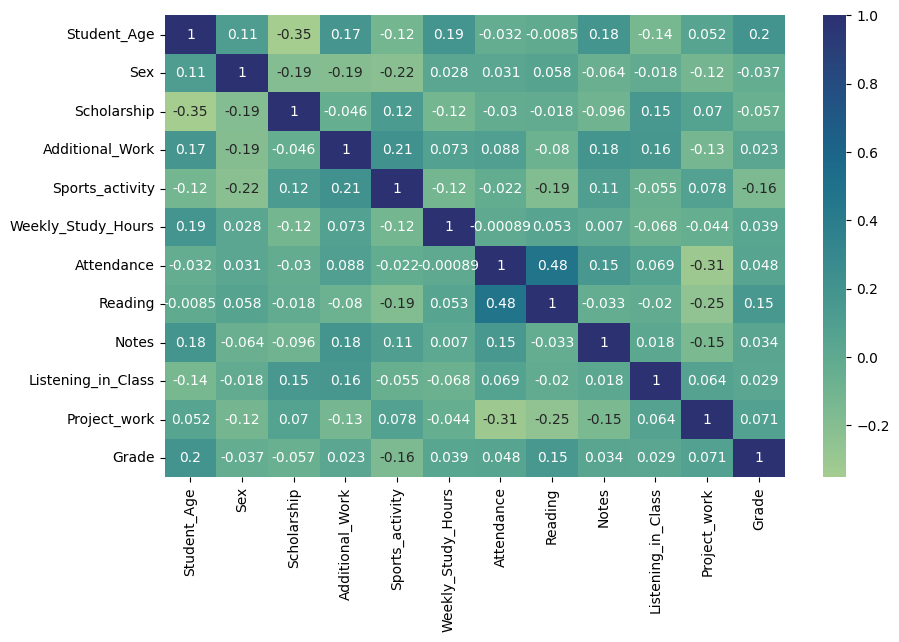

In [309]:
# mapa de calor (correlação) entre as categorias
numerical_columns = df.select_dtypes(include='number').columns
corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="crest")

Podemos verificar que as categorias possuem baixa correlação entre si.
Vemos que as notas possuem correlação positiva com a idade e a leitura do estudante, indicando que quanto mais velho ou quanto mais o aluno leia, melhor a nota.
Verificamos também que, as notas possuem correlação negativa com atividades esportivas, com tendência de que os alunos envolvidos com esportes possuem notas menores.
Um ponto curioso é que a frequência as aulas e horas de estudos semanais possuem baixissima correlação com as notas.


Vamos analisar a amostra pelo tipo de escola (Estado, Privada, Outra)

In [310]:
# análise da amostra pelo tipo de escola
df['High_School_Type'].value_counts()


State      101
Private     23
Other       17
Name: High_School_Type, dtype: int64

<Axes: xlabel='High_School_Type', ylabel='Grade'>

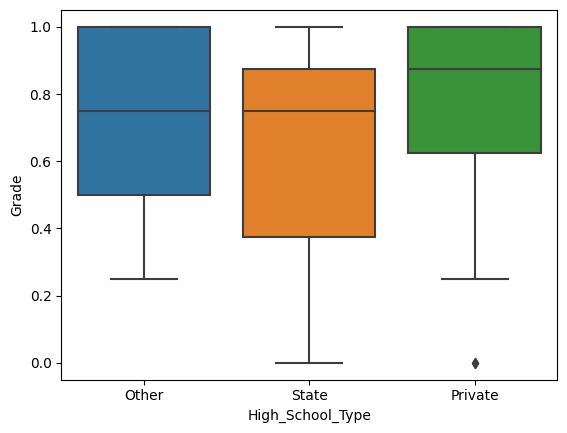

In [311]:
# boxplot dos tipos de escola
sns.boxplot(data=df, x="High_School_Type", y="Grade")

In [312]:
# contagem da frequência de notas por tipo de escola
df.groupby('High_School_Type')['Grade'].value_counts()

High_School_Type  Grade
Other             1.000     6
                  0.500     4
                  0.250     2
                  0.875     2
                  0.375     1
                  0.625     1
                  0.750     1
Private           1.000     8
                  0.875     5
                  0.750     3
                  0.000     2
                  0.250     2
                  0.625     2
                  0.375     1
State             1.000    21
                  0.750    16
                  0.875    16
                  0.500    13
                  0.250    12
                  0.375    11
                  0.000     6
                  0.625     6
Name: Grade, dtype: int64

In [313]:
# média das notas por tipo de escola
df.groupby('High_School_Type')['Grade'].mean()

High_School_Type
Other      0.705882
Private    0.728261
State      0.637376
Name: Grade, dtype: float64

Podemos auferir que as escolas do Estado são as que possuem as menores notas, em média.

Faremos agora uma análise utilizando como base na idades dos alunos.

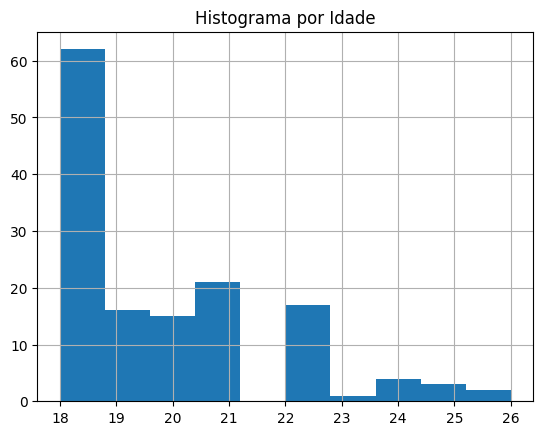

In [314]:
# histograma por idade
df['Student_Age'].hist()
plt.title('Histograma por Idade')
plt.show()

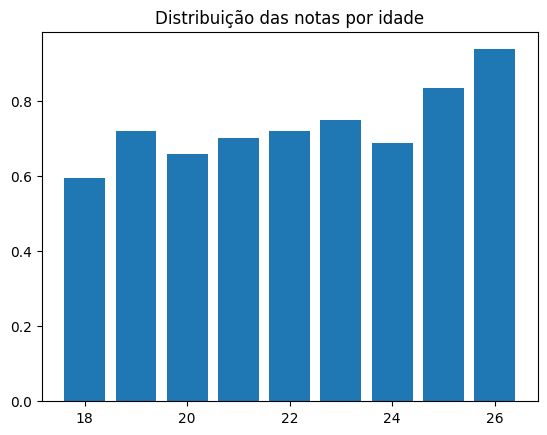

In [315]:
# análise das notas por idade dos alunos
age_grades = df.groupby('Student_Age')['Grade'].mean()
plt.bar(age_grades.index,age_grades.values)
plt.title('Distribuição das notas por idade')
plt.show()

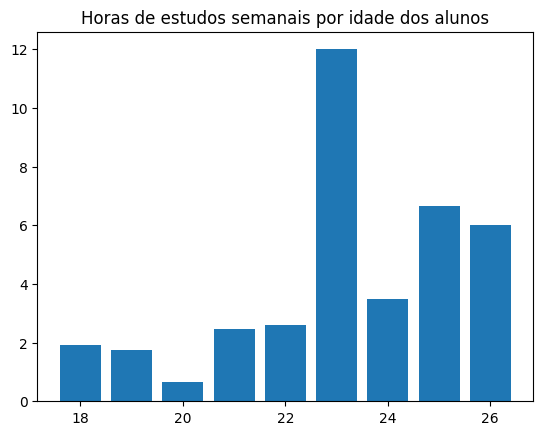

In [316]:
# horas de estudos semanais por idade dos alunos
age_study_hours = df.groupby('Student_Age')['Weekly_Study_Hours'].mean()
plt.bar(age_study_hours.index,age_study_hours.values)
plt.title('Horas de estudos semanais por idade dos alunos')
plt.show()

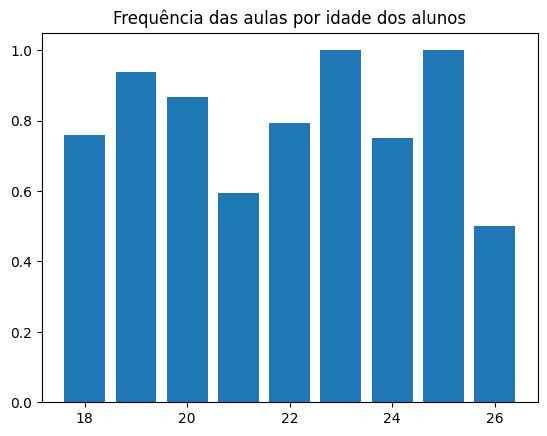

In [317]:
# frequência das aulas por idade dos alunos
age_attendence = df.groupby('Student_Age')['Attendance'].mean()
plt.bar(age_attendence.index,age_attendence.values)
plt.title('Frequência das aulas por idade dos alunos')
plt.show()

Pelos resultados apresentados, podemos auferir que idade é um bom preditor de boas notas.

A última análise que faremos será com relação ao gênero dos alunos.

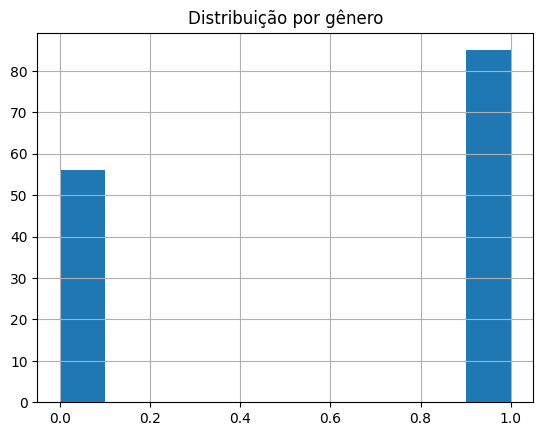

In [318]:
# distribuição dos alunos por gênero
df['Sex'].hist() #1 masculino; 0 feminino
plt.title("Distribuição por gênero")
plt.show()

In [319]:
# nota média por gênero (1=masculino e 0=feminino)
df.groupby('Sex')['Grade'].mean()

Sex
0    0.674107
1    0.651471
Name: Grade, dtype: float64

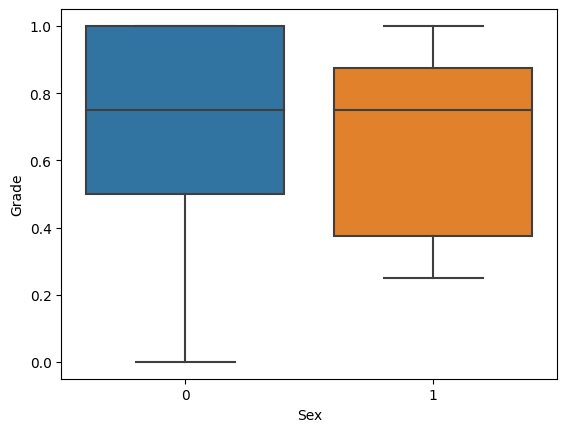

In [320]:
# boxplot do gênero por notas
sns.boxplot(data=df, x='Sex',y='Grade')
plt.show()

Temos uma maior presença do gênero masculino.
Apesar da diferença ser pequena, as mulheres apresentam notas melhores, em média.

# **5. Conclusão**

O dataset utilizado para construção do trabalho era simples, com poucas linhas e não possuia informações faltando.

Ao analisar as informações presentes no dataset, verificou-se que possuiam linhas com informações estranhas, diferentes das demais da categoria. Dado que as informçações são categóricas e com uma frequência pequena de ocorrência dos valores discrepantes, as linhas foram excluídas.

Após o tratamento proposto, os dados foram analisados e os resultados podem ser resumidos em:


1.   As categorias possuiam baixa correlação entre si.
2.   Verificamos que há uma correlação positiva entre idade do aluno e as notas. Há uma tendência de que, quanto mais velho, maior a nota. Pode-se entender como um maior grau de amadurecimento do aluno.
3.   Constatamos que há uma correlação negativa das atividades esportivas com as notas. Uma tendência de que alunos envolvidos com esportes possuem notas menores.
4.   Um ponto curioso e que mereceria uma análise mais aprofundada com outras situações para entender a relação de causualidade é devido ao fato de que a frequência das aulas e a quantidade de horas de estudos semanais possuem baixíssima correlação com as notas.
5.   Observamos que as escolas do Estado são as que possuem as menores notas, em média.
6.   A amostra possui uma maio frequência de alunos do gênero masculino. Em contrapartida, as notas, em média, são superiores para o grupo de alunos do gênero feminino.


